<a href="https://colab.research.google.com/github/dchatrina/Praktikum-Data-Mining/blob/main/A_2109116030_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import seaborn as sns

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [85]:
df = pd.read_excel("tabulasi.xlsx")
df

,whole milk,pastry,salty snack,sausage,yoghurt,semi-finished bread,soda,pickled vegetables,misc. beverages,canned beer,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bangs
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#Library untuk buat kombinasi barang
from itertools import permutations
# 2 item set
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'yoghurt'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bangs'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 

In [87]:
# Filter yang ada item kombinasi saja yang dihitung
new_rules = []
for rule in rules:
  # Filter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    new_rules.append(rule)
    
new_rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'yoghurt'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'yoghurt'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('yoghurt', 'whole milk'),
 ('yoghurt', 'sausage'),
 ('yoghurt', 'semi-finished bread'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yoghurt'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('misc. beverages', 'canned beer'),
 ('canned beer', 'misc. beverages'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 (

In [88]:
# Ganti dictionary
hitung = {} 
for rule in new_rules:
  banyak_data= len(df[(df[rule[0]]==1) & (df[rule[1]]==1)])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'yoghurt')": 1,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'yoghurt')": 1,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('yoghurt', 'whole milk')": 1,
 "('yoghurt', 'sausage')": 1,
 "('yoghurt', 'semi-finished bread')": 1,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yoghurt')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 

In [89]:
print("Daftar Support")
for item,ab in hitung.items():
  print(f"{item} -> support = {ab/len(df)*100}%")

Daftar Support
('whole milk', 'pastry') -> support = 5.263157894736842%
('whole milk', 'salty snack') -> support = 5.263157894736842%
('whole milk', 'sausage') -> support = 10.526315789473683%
('whole milk', 'yoghurt') -> support = 5.263157894736842%
('whole milk', 'semi-finished bread') -> support = 5.263157894736842%
('whole milk', 'soda') -> support = 5.263157894736842%
('whole milk', 'rolls/buns') -> support = 5.263157894736842%
('whole milk', 'butter') -> support = 5.263157894736842%
('pastry', 'whole milk') -> support = 5.263157894736842%
('pastry', 'salty snack') -> support = 5.263157894736842%
('salty snack', 'whole milk') -> support = 5.263157894736842%
('salty snack', 'pastry') -> support = 5.263157894736842%
('sausage', 'whole milk') -> support = 10.526315789473683%
('sausage', 'yoghurt') -> support = 5.263157894736842%
('sausage', 'semi-finished bread') -> support = 5.263157894736842%
('sausage', 'hygiene articles') -> support = 5.263157894736842%
('sausage', 'rolls/buns') 

In [90]:
print("Daftar Confidence")
for item,ab in hitung.items():
  #Ubah dari string jadi list
  c = eval(item) 
  print(f"{c[0]} -> {c[1]}, confidence = {ab/df[c[0]].sum()*100}%")

Daftar Confidence
whole milk -> pastry, confidence = 20.0%
whole milk -> salty snack, confidence = 20.0%
whole milk -> sausage, confidence = 40.0%
whole milk -> yoghurt, confidence = 20.0%
whole milk -> semi-finished bread, confidence = 20.0%
whole milk -> soda, confidence = 20.0%
whole milk -> rolls/buns, confidence = 20.0%
whole milk -> butter, confidence = 20.0%
pastry -> whole milk, confidence = 100.0%
pastry -> salty snack, confidence = 100.0%
salty snack -> whole milk, confidence = 100.0%
salty snack -> pastry, confidence = 100.0%
sausage -> whole milk, confidence = 50.0%
sausage -> yoghurt, confidence = 25.0%
sausage -> semi-finished bread, confidence = 25.0%
sausage -> hygiene articles, confidence = 25.0%
sausage -> rolls/buns, confidence = 50.0%
yoghurt -> whole milk, confidence = 100.0%
yoghurt -> sausage, confidence = 100.0%
yoghurt -> semi-finished bread, confidence = 100.0%
semi-finished bread -> whole milk, confidence = 100.0%
semi-finished bread -> sausage, confidence = 

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

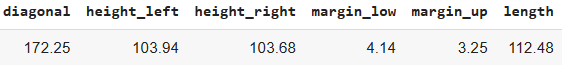
<!-- 1412 -->

In [91]:
df2 = pd.read_csv("deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [76]:
# Tambah satu row sebagai penanda targetnya
target = ['Target ',172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
df2.loc[len(df2.index)] = target
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [81]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
import math
nilai_distance = 2
jarak = []
for i in range(len(df2['is_genuine'])):
  diagonal = df['diagonal'][i] - target[1];
  height_left = df['height_left'][i] - target[2];
  height_right = df['height_right'][i] - target[3];
  margin_low = df['margin_low'][i] - target[4];
  margin_up = df['margin_up'][i] - target[5];
  length = df['length'][i] - target[6];
  jarak.append(math.sqrt(diagonal**nilai_distance + 
                         height_left**nilai_distance +
                         height_right**nilai_distance +
                         margin_low**nilai_distance +
                         margin_up**nilai_distance +
                         length**nilai_distance))

df2['Jarak'] = jarak
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


In [83]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
# Hapus baris target
df2.drop(11,axis=0,inplace=True)

# Mencari yang terdekat
K = round(math.sqrt(len(jarak)))
df2_urut = df2.sort_values('Jarak').head(K)
df2_urut

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934


In [84]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
K2 = round(math.sqrt(len(df2['is_genuine'])))
hapuslast= jarak.pop()

index1 = sorted(range(len(jarak)), key=lambda K2: jarak[K2]) [:K2]
closer = [df2['is_genuine'][i] for i in index1]
prediction = max(set(closer), key=closer.count)

print('Hasil prediksinya yaitu: ', prediction)

Hasil prediksinya yaitu:  True


# (3) Analisis

> Nama : Diana Dwi Chatrina

> Nim : 2109116030


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidikan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

### Business Understanding
-> Tujuan dataset ini adalah untuk memprediksi presentase lemak tubuh laki-laki berdasarkan beberapa variabel, seperti umur, berat badan, tinggi badan, lingkar pinggang, lingkar dada, dan lingkar pergelangan tangan. Dataset ini dapat membantu seseorang atau laki-laki dalam menentukan presentase lemak tubuh mereka dan membuat keputusan terkait kesehatan dan kebugaran.

-> Selain itu, dataset ini juga dapat berguna bagi suatu perusahaan yang bergerak pastinya di bidang kesehatan dan kebugaran, misalnya perusahaan alat kebugaran dengan produknya yaitu alat pengukur lemak tubuh, atau perusahaan yang menyediakan layanan konsultasi kebugaran dan nutrisi. Dengan memanfaatkan dataset ini, perusahaan dapat mengembangkan produk dan layanan yang lebih sesuai dengan kebutuhan pelanggan dan lebih efektif dalam membantu mencapai tujuan kesehatan dan kebugaran mereka.

### Data Understanding
-> Dataset ini berisi informasi yang nantinya akan diukur untuk memprediksi presentase lemak tubuh dari 252 laki-laki.

-> Struktur Data = Memiliki 15 variabel dengan tipe data numerik yang sumbernya dikumpulkan oleh tim peneliti Universitas Salford, UK. Density sebagai target yang diprediksi dan variabel lain sebagai prediktor.
15 variabel/kolom numerik sebagai berikut:

1. Density = sebagai target yang ingin diprediksi	
2. BodyFat = Persentase lemak tubuh dari persamaan Siri (1956)	
3. Age = umur
4. Weight	= berat badan
5. Height	= tinggi badan

Variabel 6-15 adalah ukuran lingkar
6. Neck	
7. Chest	
8. Abdomen	
9. Hip	
10. Thigh	
11. Knee	
12. Ankle	
13. Biceps	
14. Forearm	
15. Wrist

-> Kualitas Data = Terdapat beberapa missing value, juga data kosong pada beberapa kolom dan baris.

In [92]:
df3 = pd.read_csv("bodyfat.csv")
df3

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


### Data Preparation

In [33]:
df3.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [32]:
#Kolom penentu target prediksi
Target = df3.Density 
data = df3.drop(columns=["Density"])
data

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
